### Modeling and Predicting Shark Population 

I.	Introduction


The purpose of this simulation is to predict the influence of ocean pollution on the population decline of Shortfin Mako Sharks in Atlantic Canada. To achieve this goal, we made a model of shark population declination based on the data from 1970 to 2002, and predicted a correlated relationship between the increasing ocean pollution and the decrease in shark population. Furthermore, we made projections based on the correlation we found, and predicted the future trend of shark population with different pollution levels. In order to make the model more realistic, we introduced a normally-distributed decline rate. 


II. Importing Python Libraries

In the following essay, the libraries used include ModSim.py module, pandas (read_html), matplotlib.pyplot and numpy.

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module and additional functions for normal distributions
from modsim import *

from pandas import read_html

import matplotlib.pyplot as plt
import numpy as np
import random


III. Importing Data

In this part, we import the data of Shortfin Mako Sharks in Atlantic Canada from Canadian Science Advisory Secretariat, and the data of cumulative global plastics production, which is later converted into the pollution data used in the following model. We plot the graph of shark population as well as pollution against time, and generate a mathematical formula in Matlab to discribe the trend of them. It is clearly shown that the trend of population of shark slopes downwards as while pollution increases. 

In [2]:
#Import data as csv and then set columns as variables
table=pd.read_csv('data/FishDataRefined.csv')
year=table.Year
pollution=table.Pollution
sharks=table.Sharks
print(table)

    Year     Plastic    Pollution  Sharks
0   1970   249000000    8560.4706    1.59
1   1971   287000000    9866.8878    1.63
2   1972   331000000   11379.5814    1.74
3   1973   382000000   13132.9308    1.41
4   1974   434000000   14920.6596    1.56
5   1975   480000000   16502.1120    1.57
6   1976   534000000   18358.5996    1.78
7   1977   593000000   20386.9842    2.35
8   1978   657000000   22587.2658    1.41
9   1979   728000000   25028.2032    1.17
10  1980   798000000   27434.7612    1.32
11  1981   870000000   29910.0780    1.62
12  1982   943000000   32419.7742    1.14
13  1983  1023000000   35170.1262    1.01
14  1984  1109000000   38126.7546    0.99
15  1985  1199000000   41220.9006    1.29
16  1986  1295000000   44521.3230    1.27
17  1987  1399000000   48096.7806    0.99
18  1988  1509000000   51878.5146    1.16
19  1989  1623000000   55797.7662    1.01
20  1990  1743000000   59923.2942    0.93
21  1991  1867000000   64186.3398    1.03
22  1992  1999000000   68724.4206 

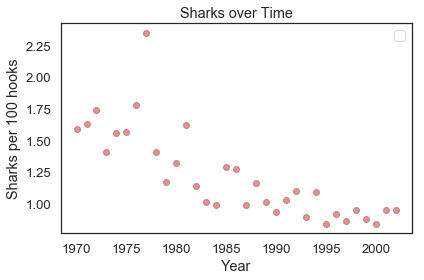

In [3]:
# make a simple plot of sharks from the original data
plot(year,sharks,"ro")

decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time')


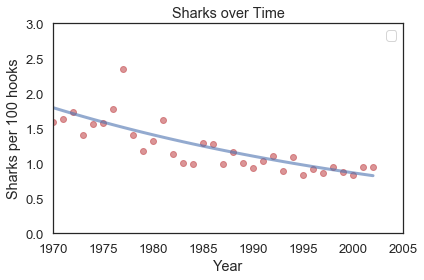

In [4]:
#find a regression equation for sharks
sharkModelExp=1.795*exp(-0.02435*((year-1970))) # regression equation
plot(year,sharks,"ro")

plot(year,sharkModelExp)
decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time',xlim=[1970,2005],ylim=[0,3])

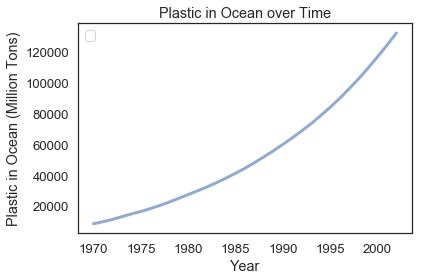

In [5]:
# plot a simple graph of pollution over time
plot (year,pollution)
decorate(xlabel='Year', 
             ylabel='Plastic in Ocean (Million Tons)',
             title='Plastic in Ocean over Time')

The graph below shows the growth rate per year of the shark population from 1970 to 2002

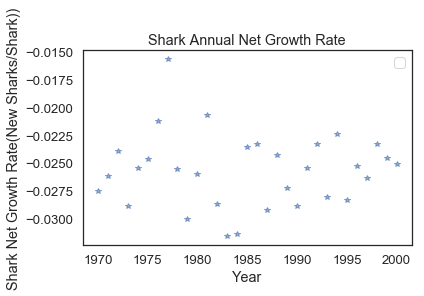

In [6]:
# plot growth rate of sharks as derivative of amount
sharkRateReg2=-29747643494751453184 *exp(-0.02435 *table.Year) #The derivative of the regression equation for sharks(From Matlab)
plot(year[0:31],(sharkRateReg2/sharks)[0:31],'*' ) #plot the rate of shark reproduction per shark, aka growth rate
decorate(xlabel='Year', 
             ylabel='Shark Net Growth Rate(New Sharks/Shark))',
             title='Shark Annual Net Growth Rate')


Now the rate of pollution and sharks are graphed and fitted with linear aproximations

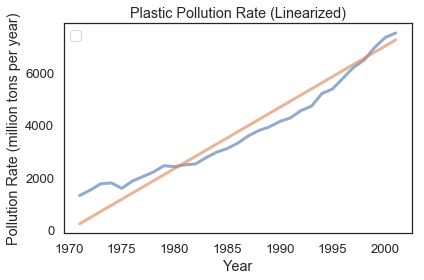

In [7]:
# create a function that finds the rate of change of a data set
def rate_finder(data):
    rate=[]
    for i in linrange(1, 32, 1):
        rate.append(data[i]-data[i-1])
    return rate

# run the function on the pollution data
pollutionRate=rate_finder(pollution)


plot(linrange(1, 32, 1)+1970,pollutionRate)     #Plot pollution rate and find a fit function for it
pollutionRateLin=(7000/30)*(linrange(1, 32, 1)) #the fit function
plot(linrange(1, 32, 1)+1970,pollutionRateLin)

decorate(xlabel='Year', 
             ylabel='Pollution Rate (million tons per year)',
             title='Plastic Pollution Rate (Linearized)')

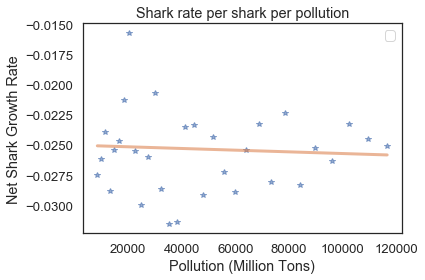

In [8]:
# find a relationship between sark rate and pollution
plot(pollution[0:31],(sharkRateReg2/sharks)[0:31],'*' ) #plot initial data

plot(pollution[0:31],-.000000007*pollution[0:31]-.025)  #This is the final equation relating pollution to shark rates that can be put into the probability function.
decorate(xlabel='Pollution (Million Tons)', 
             ylabel='Net Shark Growth Rate',
             title='Shark rate per shark per pollution')


V. Adding Randomness into the Model

In this part, by applying the normal distribution function in numpy, we generated a probability curve of the shark population decline rate. The decline rate is normally distributed and randomly selected, which means the further the value deviates from mean value, the less possible for it to occur. The standard deviation of this normal distribution is generated from the standard diviation of decline rate from past data. The following graph shows the case when mean is chosen to be 0.4. 

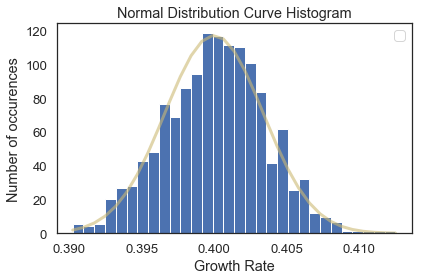

In [9]:
# define a normal distribution function
def norm(mu, sigma, size):
    s = np.random.normal(mu, sigma,size)
    return s

# set a variable s to this distribution
s = norm(0.4, 0.0034,1000)

# plot a histogram of the data
count, bins, ignored = plt.hist(s, 30, density=True)

# plot a bell curve of histogram
def plot_norm(mean, sd):
    plot(bins, 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * sd**2) ), linewidth=3, color='y')

    decorate(xlabel='Growth Rate', 
             ylabel='Number of occurences',
             title='Normal Distribution Curve Histogram')

plot_norm(0.4, 0.0034)


VI. Projection of Shark Population

In the following part, we generated a projection based on the formula we got in the parts above. We run the simulation for three different pollution rates and plot the results to show the influence of pollution rate to shark population. 

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


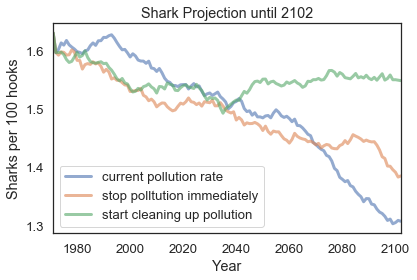

In [10]:
# define a simulation that will plot shark rates into the future based on plastic input

def Simulation(a):
    # define series
    pollutionRate=TimeSeries()
    SharkRate=TimeSeries()
    sharksnumber=TimeSeries()
    
    # define initial conditions
    pollutionRate[1971]=700/3
    sharksnumber[1971]=1.63
    pollution[1971]=9866.8878
    SharkRate[1971]=-.00000007*pollution[1971]-.02
    
    # run loop from 1971 to 2102
    for i in linrange(1971,2102):
        pollutionRate[i]=a*(i-1970)
        pollution[i+1] = pollution[i]+pollutionRate[i]
        SharkRate[i+1]= random.choice(norm(-.0000000007*pollution[i]-.001, .0034,1))
        sharksnumber[i+1]= sharksnumber[i]+sharksnumber[i]*SharkRate[i]
    return sharksnumber
    
    
# run the simulation for three different pollution rates and plot the results
sharkProjection=Simulation(700/3) #keep polluting
sharkProjection2=Simulation(0) #stop polluting
sharkProjection3=Simulation(-700/3) #clean pollution
plot(sharkProjection,label = 'current pollution rate')
plot(sharkProjection2,label = 'stop polltution immediately')
plot(sharkProjection3, label = 'start cleaning up pollution')

decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Shark Projection until 2102', xlim=[1971,2102])

We also create a new simulation to show the shark population at the mean and at +- 1 standard deviation.

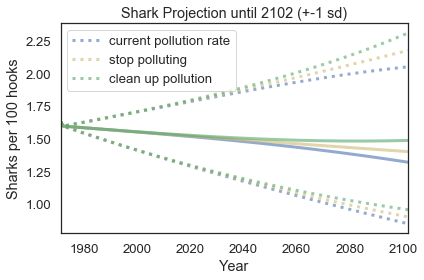

In [11]:
# run a simulation to show shark amounts at the mean and at +- 1 standard deviations from it

def Simulation(a,b):
    # define series
    pollutionRate=TimeSeries()
    SharkRate=TimeSeries()
    sharksnumber=TimeSeries()
    
    # define initial conditions
    pollutionRate[1971]=700/3
    sharksnumber[1971]=1.63
    pollution[1971]=9866.8878
    SharkRate[1971]=-.00000007*pollution[1971]-.02
    
    # run loop
    for i in linrange(1971,2102):
        pollutionRate[i]=a*(i-1970)
        pollution[i+1] = pollution[i]+pollutionRate[i]
        SharkRate[i+1]= b+(-.0000000007*pollution[i]-.001)
        sharksnumber[i+1]= sharksnumber[i]+sharksnumber[i]*SharkRate[i]
    return sharksnumber
    
# plot three graphs for each pollution condition (mean, +1 sd, -1 sd)
sharkProjection=Simulation(700/3,.0034)
sharkProjection2=Simulation(700/3,-.0034)
sharkProjection3=Simulation(0,.0034)
sharkProjection4=Simulation(0,-.0034)
sharkProjection5=Simulation(-700/3,.0034)
sharkProjection6=Simulation(-700/3,-.0034)
sharkProjection7=Simulation(700/3,0)
sharkProjection8=Simulation(0,0)
sharkProjection9=Simulation(-700/3,0)

plot(sharkProjection,':',label = 'current pollution rate', color='b')
plot(sharkProjection2,':', color='b')
plot(sharkProjection7, color='b')
plot(sharkProjection3,':',label = 'stop polluting', color='y')
plot(sharkProjection4,':', color='y')
plot(sharkProjection8, color='y')
plot(sharkProjection5,':',label = 'clean up pollution', color='g')
plot(sharkProjection6,':', color='g')
plot(sharkProjection9, color='g')

decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Shark Projection until 2102 (+-1 sd)', xlim=[1971,2102])


VII. Conclusion

 Shortfin Mako Sharks are classified as a vulnerable species in the Atlantic Ocean. For years pollution in the North Atlantic has been building, corresponding to their stark decline. This evokes our research question: if humans stop polluting the ocean, or even start to cleaning up the ocean, how will the shark population change accordingly? Intuitively, the less amount of pollution provides a better environment for sharks and the population is expected to recover. After modelling, we find out that if people continues polluting, the sharks species faces an danger of extinction within 100 years. If people stop polluting immediately, the population tends to be stable. If people start to cleaning up the polution at the same rate they produced it, the population of shark is likely to recover and increase. 